****
## JSON exercise - Ray Gunawidjaja

Using data in file 'data/world_bank_projects.json' (http://jsonstudio.com/wp-content/uploads/2014/02/world_bank.zip),

1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [210]:
#import statements
import pandas as pd
import re
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt

# <b> 1. Find the 10 countries with most projects </b>  

In [211]:
#convert json file into pandas DataFrame to allow inspection of column names.
world_bank_df = pd.read_json('data/world_bank_projects.json')

#(i) inspect DataFrame
world_bank_df.head(3) #inspect contents

#(ii) column names as a list
world_bank_df.columns #inspect column names

Index(['_id', 'approvalfy', 'board_approval_month', 'boardapprovaldate',
       'borrower', 'closingdate', 'country_namecode', 'countrycode',
       'countryname', 'countryshortname', 'docty', 'envassesmentcategorycode',
       'grantamt', 'ibrdcommamt', 'id', 'idacommamt', 'impagency',
       'lendinginstr', 'lendinginstrtype', 'lendprojectcost',
       'majorsector_percent', 'mjsector_namecode', 'mjtheme',
       'mjtheme_namecode', 'mjthemecode', 'prodline', 'prodlinetext',
       'productlinetype', 'project_abstract', 'project_name', 'projectdocs',
       'projectfinancialtype', 'projectstatusdisplay', 'regionname', 'sector',
       'sector1', 'sector2', 'sector3', 'sector4', 'sector_namecode',
       'sectorcode', 'source', 'status', 'supplementprojectflg', 'theme1',
       'theme_namecode', 'themecode', 'totalamt', 'totalcommamt', 'url'],
      dtype='object')

In [212]:
#(iii) LOOK for column names that contain the keyword proj

#Use regex to filter for columns that contain the keyword proj
obj=re.compile(r'proj')

#create a list variable that initially contain 'countryshortname' column names
my_list1=['countryshortname']

#extract column names that contain the keyword proj
my_list2=[each for each in world_bank_df.columns if obj.search(each)]

#combine the two lists
my_proj_list = my_list1 + my_list2

print('list of column names that contain the keyword proj:')
print(my_proj_list) #check list

#print contents of these columns in the DataFrame
world_bank_proj_df=world_bank_df[my_proj_list]
#world_bank_proj_df #check

#group by county and sort by total number of projects
world_bank_proj_df_grouped=world_bank_proj_df.groupby('countryshortname').count().sort_values('project_name',ascending=False)

print('\n')
print('10 countries with most projects')
world_bank_proj_df_grouped['project_name'].head(10) #print only the heading project_name


list of column names that contain the keyword proj:
['countryshortname', 'lendprojectcost', 'project_abstract', 'project_name', 'projectdocs', 'projectfinancialtype', 'projectstatusdisplay', 'supplementprojectflg']


10 countries with most projects


countryshortname
China                 19
Indonesia             19
Vietnam               17
India                 16
Yemen, Republic of    13
Nepal                 12
Bangladesh            12
Morocco               12
Mozambique            11
Africa                11
Name: project_name, dtype: int64

In [213]:
#Add validation using list of african countries
#get a complete list of African countries.

import requests
from bs4 import BeautifulSoup  # for webscraping

# Request information from wikipedia
res = requests.get("https://en.wikipedia.org/wiki/List_of_African_Union_member_states_by_political_system")

# Create a BeautifulSoup class
soup = BeautifulSoup(res.content, 'lxml')

# Extract info. from a table
table = soup.find_all(class_="wikitable")[0]

# Load table info. into a Pandas DataFrame
df = pd.read_html(str(table), header=0)[0] #, index_col='Chemical class')[0]
african_countries_list=list(df.State) #turn into a list
#number of african countries:
print('number of african countries:',len(african_countries_list)) #check
print('\n')
print(african_countries_list, end='') #check


number of african countries: 55


['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Cape Verde', 'Central African Republic', 'Chad', 'Comoros', 'Democratic Republic of the Congo', 'Republic of the Congo', 'Ivory Coast', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'São Tomé and Príncipe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Swaziland', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Sahrawi Arab Democratic Republic', 'Zambia', 'Zimbabwe']

In [214]:
#total number of projects corresponding to all African countries
print("Total number of projects corresponding to all African countries:", world_bank_df[world_bank_df.countryshortname.isin(african_countries_list)].project_name.count()) 

#total number of African countries
print("Total no. of african countries in world_bank_df:", len(set(world_bank_df.countryshortname[world_bank_df.countryshortname.isin(african_countries_list)])))

print('\n')
#List of african countries in world_bank_df 
print("List of african countries in world_bank_df:", sorted(list(set(world_bank_df.countryshortname[world_bank_df.countryshortname.isin(african_countries_list)]))))

Total number of projects corresponding to all African countries: 145
Total no. of african countries in world_bank_df: 38


List of african countries in world_bank_df: ['Angola', 'Benin', 'Burkina Faso', 'Burundi', 'Cameroon', 'Cape Verde', 'Central African Republic', 'Chad', 'Comoros', 'Djibouti', 'Ethiopia', 'Ghana', 'Guinea', 'Kenya', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Senegal', 'Seychelles', 'Sierra Leone', 'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe']


Given that the total number of projects corresponding to all African countries exceed 'Africa' under the 'countryshortname' on world_bank_df (i.e., 145 versus 10), the countryshortname 'Africa' is most likely a typo.

Excluding 'Africa' as the 10 countries with most projects, we have: 

In [215]:
#This time, remove Africa from world_bank_df list and re-do the ranking
#world_bank_proj_df_grouped=world_bank_proj_df_grouped.drop(world_bank_proj_df_grouped.index['Africa'])

#world_bank_proj_df_grouped=world_bank_proj_df_grouped[world_bank_proj_df_grouped.index=='Africa'].drop
world_bank_proj_df_grouped=world_bank_proj_df_grouped.drop(['Africa'])

world_bank_proj_df_grouped.project_name.head(10) #.head(10) #This is not working out!


countryshortname
China                 19
Indonesia             19
Vietnam               17
India                 16
Yemen, Republic of    13
Nepal                 12
Bangladesh            12
Morocco               12
Mozambique            11
Pakistan               9
Name: project_name, dtype: int64

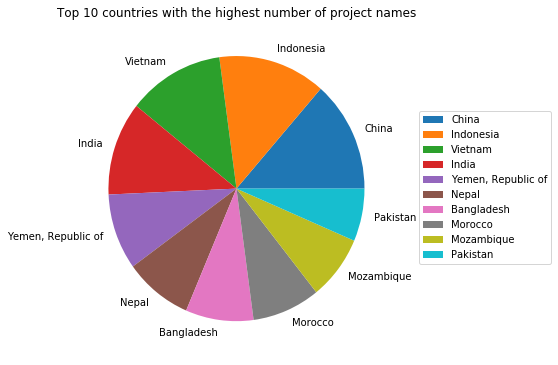

In [216]:
#display top ten countries with most no. of projects into a pie chart 
#plt.plot(figsize=(20, 10)) 
world_bank_proj_df_grouped.head(10).plot.pie(['project_name'],figsize=(5, 5))
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.5, 0.75))
plt.title('Top 10 countries with the highest number of project names')
plt.ylabel('')
plt.show()

In [217]:
from IPython.display import display, Markdown

display(Markdown('## <span style="color:blue"> Therefore, the 10 countries with most projects are:</span>')) 
print(list(world_bank_proj_df_grouped.index[:10]))

## <span style="color:blue"> Therefore, the 10 countries with most projects are:</span>

['China', 'Indonesia', 'Vietnam', 'India', 'Yemen, Republic of', 'Nepal', 'Bangladesh', 'Morocco', 'Mozambique', 'Pakistan']


# <b> 2. Find the top 10 major project themes (using column 'mjtheme_namecode') </b>   

In [218]:
#Loading 'mjtheme_namecode' column reveals that it is a list of dictionary
world_bank_df['mjtheme_namecode']

#To unpack the content, we use the command json_normalize.
#To do so, we have to first create a world_bank list
world_bank_json=json.load((open('data/world_bank_projects.json')))

#Now, let's unpack the list of dictionary
unpacked_mjtheme_namecode=json_normalize(world_bank_json,'mjtheme_namecode')

#The data type is a DataFrame
type(unpacked_mjtheme_namecode) 

#Let's count the number of recurring projects
count_project_themes=unpacked_mjtheme_namecode.groupby('code').count()
count_project_themes.columns=['counts'] #rename column to 'counts'

count_project_themes.index=count_project_themes.index.astype(int) #change data type of index to int
#print(count_project_themes.sort_index(ascending=False)) #test

count_project_themes=count_project_themes.reset_index('code') #turn code index into a column

count_project_themes.sort_values('counts', ascending=False) #sort by 'counts'


,code,counts
2,11,250
1,10,216
9,8,210
3,2,199
7,6,168
5,4,146
8,7,130
6,5,77
10,9,50
0,1,38


In [219]:
#create a new dataframe of world_bank mjtheme_namecodes and the corresponding names 

mjtheme_namecodes_df=unpacked_mjtheme_namecode[unpacked_mjtheme_namecode.name != ''].drop_duplicates() #remove all empty cells
mjtheme_namecodes_df.code=mjtheme_namecodes_df.code.astype(int) #change data type to integers
mjtheme_namecodes_df.sort_values('code',ascending=True) #sort by codes


,code,name
2,1,Economic management
5,2,Public sector governance
252,3,Rule of law
11,4,Financial and private sector development
4,5,Trade and integration
3,6,Social protection and risk management
8,7,Social dev/gender/inclusion
0,8,Human development
53,9,Urban development
18,10,Rural development


In [220]:
#combine count_project_themes with mjtheme_namecodes_df
project_themes_count_labelled=pd.merge(count_project_themes, mjtheme_namecodes_df, on='code').sort_values('counts', ascending=False)
project_themes_count_labelled.head(10)

,code,counts,name
2,11,250,Environment and natural resources management
1,10,216,Rural development
9,8,210,Human development
3,2,199,Public sector governance
7,6,168,Social protection and risk management
5,4,146,Financial and private sector development
8,7,130,Social dev/gender/inclusion
6,5,77,Trade and integration
10,9,50,Urban development
0,1,38,Economic management


In [221]:
display(Markdown('## <span style="color:blue"> Therefore, the top 10 major project themes in descending order are:</span>')) 
print(list(project_themes_count_labelled.name.head(10)))

## <span style="color:blue"> Therefore, the top 10 major project themes in descending order are:</span>

['Environment and natural resources management', 'Rural development', 'Human development', 'Public sector governance', 'Social protection and risk management', 'Financial and private sector development', 'Social dev/gender/inclusion', 'Trade and integration', 'Urban development', 'Economic management']


# <b> 3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in. </b> 

In [222]:
#turn the 'code' and 'name' columns in mjtheme_namecode column into a dictionary
project_themes_codes_dict=dict(zip(list(project_themes_count_labelled['code']),list(project_themes_count_labelled['name'])))
#project_themes_codes_dict #check

#project_themes_count_labelled=project_themes_count_labelled.set_index('code') #set 'code' column as the index


#unpacked_mjtheme_namecode.head(5) #check
#create a newpandas DataFrame
mjtheme_namecode_labelled=pd.DataFrame()
mjtheme_namecode_labelled['code']=unpacked_mjtheme_namecode.code.astype(int) #add a new column 'code' with a converted data type of integer
mjtheme_namecode_labelled['name']=unpacked_mjtheme_namecode.name
##mjtheme_namecode_labelled #check

#fill out empty cells with names
mjtheme_namecode_labelled.name=mjtheme_namecode_labelled.name.replace('',mjtheme_namecode_labelled.code.map(project_themes_codes_dict)) #replace empty cells with codess

print(mjtheme_namecode_labelled.head(20)) #check


    code                                          name
0      8                             Human development
1     11  Environment and natural resources management
2      1                           Economic management
3      6         Social protection and risk management
4      5                         Trade and integration
5      2                      Public sector governance
6     11  Environment and natural resources management
7      6         Social protection and risk management
8      7                   Social dev/gender/inclusion
9      7                   Social dev/gender/inclusion
10     5                         Trade and integration
11     4      Financial and private sector development
12     6         Social protection and risk management
13     6         Social protection and risk management
14     2                      Public sector governance
15     4      Financial and private sector development
16    11  Environment and natural resources management
17     8  

In [223]:
#Validation. Count the number of empty cells before and after treatments.

#unpacked_mjtheme_namecode.head(10)
print("No. of empty cellls within the unpacked_mjtheme_namecode['name'] column is:", list(unpacked_mjtheme_namecode[unpacked_mjtheme_namecode.name==''].count())[0])

#mjtheme_namecode_labelled.head(10)
print("No. of empty cells within the mjtheme_namecode_labelled['name'] column is:", list(mjtheme_namecode_labelled[mjtheme_namecode_labelled.name==''].count())[0])


No. of empty cellls within the unpacked_mjtheme_namecode['name'] column is: 122
No. of empty cells within the mjtheme_namecode_labelled['name'] column is: 0


In [224]:
display(Markdown('## <span style="color:blue"> The empty cells within the \'name\' column have been filled and validated, the number of missing cells was:</span>')) 
print(list(unpacked_mjtheme_namecode[unpacked_mjtheme_namecode.name==''].count())[0])

## <span style="color:blue"> The empty cells within the 'name' column have been filled and validated, the number of missing cells was:</span>

122
